## SMA Crossover

Final portfolio value: $717571.99
Cumulative returns: -28.24 %
Sharpe ratio: -2.48
Max. drawdown: 28.84 %
Longest drawdown duration: 505 days, 0:00:00

Total trades: 18
Avg. profit: $-15690
Profits std. dev.: $20836
Max. profit: $17228
Min. profit: $-87186
Avg. return: -2 %
Returns std. dev.:  2 %
Max. return:  2 %
Min. return: -10 %

Profitable trades: 2
Avg. profit: $8883
Profits std. dev.: $8345
Max. profit: $17228
Min. profit: $538
Avg. return:  1 %
Returns std. dev.:  1 %
Max. return:  2 %
Min. return:  0 %

Unprofitable trades: 16
Avg. loss: $-18762
Losses std. dev.: $19869
Max. loss: $-87186
Min. loss: $-531
Avg. return: -3 %
Returns std. dev.:  2 %
Max. return: -0 %
Min. return: -10 %


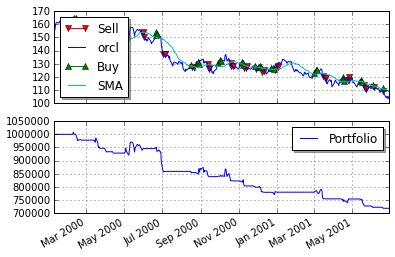

In [50]:
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.stratanalyzer import returns
from pyalgotrade.stratanalyzer import sharpe
from pyalgotrade.stratanalyzer import drawdown
from pyalgotrade.stratanalyzer import trades
import sma_crossover

# Load the yahoo feed from the CSV file
feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "data_00_01.csv")

# Evaluate the strategy with the feed's bars.
myStrategy = sma_crossover.SMACrossOver(feed, "orcl", 20)

# Attach the plotter to the strategy.
plt= plotter.StrategyPlotter(myStrategy)
# Include the SMA in the instrument's subplot to get it displayed along with the closing prices.
plt.getInstrumentSubplot("orcl").addDataSeries("SMA", myStrategy.getSMA())
# Plot the simple returns on each bar.
#plt.getOrCreateSubplot("returns").addDataSeries("Simple returns", returnsAnalyzer.getReturns())

# Attach different analyzers to a strategy before executing it.
retAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(retAnalyzer)
sharpeRatioAnalyzer = sharpe.SharpeRatio()
myStrategy.attachAnalyzer(sharpeRatioAnalyzer)
drawDownAnalyzer = drawdown.DrawDown()
myStrategy.attachAnalyzer(drawDownAnalyzer)
tradesAnalyzer = trades.Trades()
myStrategy.attachAnalyzer(tradesAnalyzer)

# Run the strategy.
myStrategy.run()

print "Final portfolio value: $%.2f" % myStrategy.getResult()
print "Cumulative returns: %.2f %%" % (retAnalyzer.getCumulativeReturns()[-1] * 100)
print "Sharpe ratio: %.2f" % (sharpeRatioAnalyzer.getSharpeRatio(0.05))
print "Max. drawdown: %.2f %%" % (drawDownAnalyzer.getMaxDrawDown() * 100)
print "Longest drawdown duration: %s" % (drawDownAnalyzer.getLongestDrawDownDuration())

print
print "Total trades: %d" % (tradesAnalyzer.getCount())
if tradesAnalyzer.getCount() > 0:
    profits = tradesAnalyzer.getAll()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getAllReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Profitable trades: %d" % (tradesAnalyzer.getProfitableCount())
if tradesAnalyzer.getProfitableCount() > 0:
    profits = tradesAnalyzer.getProfits()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getPositiveReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Unprofitable trades: %d" % (tradesAnalyzer.getUnprofitableCount())
if tradesAnalyzer.getUnprofitableCount() > 0:
    losses = tradesAnalyzer.getLosses()
    print "Avg. loss: $%2.f" % (losses.mean())
    print "Losses std. dev.: $%2.f" % (losses.std())
    print "Max. loss: $%2.f" % (losses.min())
    print "Min. loss: $%2.f" % (losses.max())
    returns = tradesAnalyzer.getNegativeReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

plt.plot()

## VWAP Momentum

Final portfolio value: $1017271.97
Cumulative returns: 1.73 %
Sharpe ratio: -0.08
Max. drawdown: 16.92 %
Longest drawdown duration: 188 days, 0:00:00

Total trades: 6
Avg. profit: $2879
Profits std. dev.: $18117
Max. profit: $42834
Min. profit: $-10231
Avg. return: -2 %
Returns std. dev.:  3 %
Max. return:  4 %
Min. return: -5 %

Profitable trades: 1
Avg. profit: $42834
Profits std. dev.: $ 0
Max. profit: $42834
Min. profit: $42834
Avg. return:  4 %
Returns std. dev.:  0 %
Max. return:  4 %
Min. return:  4 %

Unprofitable trades: 5
Avg. loss: $-5112
Losses std. dev.: $3273
Max. loss: $-10231
Min. loss: $-1152
Avg. return: -3 %
Returns std. dev.:  1 %
Max. return: -2 %
Min. return: -5 %


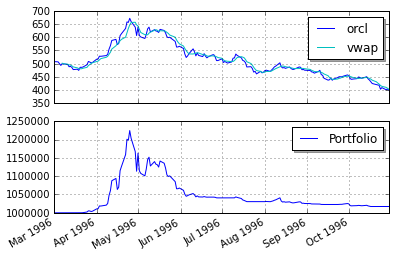

In [48]:
from pyalgotrade import strategy
from pyalgotrade.tools import yahoofinance
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import vwap
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade import plotter
from pyalgotrade.stratanalyzer import returns
from pyalgotrade.stratanalyzer import sharpe
from pyalgotrade.stratanalyzer import drawdown
from pyalgotrade.stratanalyzer import trades
import VWAPM
import matplotlib.pyplot as plt 

# Load the yahoo feed from the CSV file
feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "data_96_3_10.csv")

#def main(plot):
instrument = "orcl"
vwapWindowSize = 5
threshold = 0.01
plot=True

# Evaluate the strategy with the feed's bars.
myStrategy = VWAPM.VWAPMomentum(feed, instrument, vwapWindowSize, threshold)

# Attach different analyzers to a strategy before executing it.
retAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(retAnalyzer)
sharpeRatioAnalyzer = sharpe.SharpeRatio()
myStrategy.attachAnalyzer(sharpeRatioAnalyzer)
drawDownAnalyzer = drawdown.DrawDown()
myStrategy.attachAnalyzer(drawDownAnalyzer)
tradesAnalyzer = trades.Trades()
myStrategy.attachAnalyzer(tradesAnalyzer)

if plot:
    plt = plotter.StrategyPlotter(myStrategy, True, False, True)
    plt.getInstrumentSubplot(instrument).addDataSeries("vwap", myStrategy.getVWAP())
    
# Run the strategy.
myStrategy.run()

print "Final portfolio value: $%.2f" % myStrategy.getResult()
print "Cumulative returns: %.2f %%" % (retAnalyzer.getCumulativeReturns()[-1] * 100)
print "Sharpe ratio: %.2f" % (sharpeRatioAnalyzer.getSharpeRatio(0.05))
print "Max. drawdown: %.2f %%" % (drawDownAnalyzer.getMaxDrawDown() * 100)
print "Longest drawdown duration: %s" % (drawDownAnalyzer.getLongestDrawDownDuration())

print
print "Total trades: %d" % (tradesAnalyzer.getCount())
if tradesAnalyzer.getCount() > 0:
    profits = tradesAnalyzer.getAll()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getAllReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Profitable trades: %d" % (tradesAnalyzer.getProfitableCount())
if tradesAnalyzer.getProfitableCount() > 0:
    profits = tradesAnalyzer.getProfits()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getPositiveReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Unprofitable trades: %d" % (tradesAnalyzer.getUnprofitableCount())
if tradesAnalyzer.getUnprofitableCount() > 0:
    losses = tradesAnalyzer.getLosses()
    print "Avg. loss: $%2.f" % (losses.mean())
    print "Losses std. dev.: $%2.f" % (losses.std())
    print "Max. loss: $%2.f" % (losses.min())
    print "Min. loss: $%2.f" % (losses.max())
    returns = tradesAnalyzer.getNegativeReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)
    
if plot:
    plt.plot()

## Bollinger Bands

DEBUG:broker.backtesting:Not enough cash to fill orcl order [19] for 2051 share/s
1996-01-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill orcl order [19] for 2051 share/s
DEBUG:broker.backtesting:Not enough cash to fill orcl order [20] for 2055 share/s
1996-01-18 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill orcl order [20] for 2055 share/s


Final portfolio value: $652780.31
Cumulative returns: -34.72 %
Sharpe ratio: -0.60
Max. drawdown: 57.80 %
Longest drawdown duration: 6048 days, 0:00:00

Total trades: 38
Avg. profit: $-8692
Profits std. dev.: $79832
Max. profit: $111032
Min. profit: $-301796
Avg. return:  0 %
Returns std. dev.: 12 %
Max. return: 17 %
Min. return: -35 %

Profitable trades: 22
Avg. profit: $34397
Profits std. dev.: $25552
Max. profit: $111032
Min. profit: $2149
Avg. return:  9 %
Returns std. dev.:  5 %
Max. return: 17 %
Min. return:  1 %

Unprofitable trades: 16
Avg. loss: $-67940
Losses std. dev.: $90418
Max. loss: $-301796
Min. loss: $-1925
Avg. return: -11 %
Returns std. dev.: 10 %
Max. return: -1 %
Min. return: -35 %


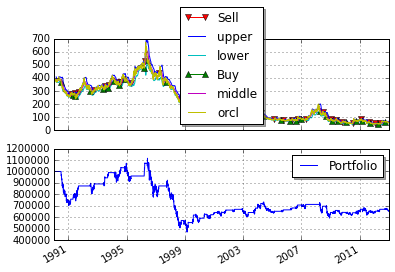

In [45]:
from pyalgotrade.stratanalyzer import returns
from pyalgotrade.stratanalyzer import sharpe
from pyalgotrade.stratanalyzer import drawdown
from pyalgotrade.stratanalyzer import trades

from pyalgotrade import strategy
from pyalgotrade.strategy import position
from pyalgotrade import plotter
from pyalgotrade.tools import yahoofinance
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import bollinger
from pyalgotrade.stratanalyzer import sharpe
import BBands

import matplotlib.pyplot as plt 
%matplotlib inline
# Load the yahoo feed from the CSV file
feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "data_daily.csv")

#def main(plot):
instrument = "orcl"
bBandsPeriod = 40
plot=True

# Evaluate the strategy with the feed's bars.
myStrategy = BBands.BBands(feed, instrument, bBandsPeriod)
  
if plot:
    plt = plotter.StrategyPlotter(myStrategy, True, True, True)
    plt.getInstrumentSubplot(instrument).addDataSeries("upper", myStrategy.getBollingerBands().getUpperBand())
    plt.getInstrumentSubplot(instrument).addDataSeries("middle", myStrategy.getBollingerBands().getMiddleBand())
    plt.getInstrumentSubplot(instrument).addDataSeries("lower", myStrategy.getBollingerBands().getLowerBand())
    
# Attach different analyzers to a strategy before executing it.
retAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(retAnalyzer)
sharpeRatioAnalyzer = sharpe.SharpeRatio()
myStrategy.attachAnalyzer(sharpeRatioAnalyzer)
drawDownAnalyzer = drawdown.DrawDown()
myStrategy.attachAnalyzer(drawDownAnalyzer)
tradesAnalyzer = trades.Trades()
myStrategy.attachAnalyzer(tradesAnalyzer)
    
# Run the strategy.
myStrategy.run()

print "Final portfolio value: $%.2f" % myStrategy.getResult()
print "Cumulative returns: %.2f %%" % (retAnalyzer.getCumulativeReturns()[-1] * 100)
print "Sharpe ratio: %.2f" % (sharpeRatioAnalyzer.getSharpeRatio(0.05))
print "Max. drawdown: %.2f %%" % (drawDownAnalyzer.getMaxDrawDown() * 100)
print "Longest drawdown duration: %s" % (drawDownAnalyzer.getLongestDrawDownDuration())

print
print "Total trades: %d" % (tradesAnalyzer.getCount())
if tradesAnalyzer.getCount() > 0:
    profits = tradesAnalyzer.getAll()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getAllReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Profitable trades: %d" % (tradesAnalyzer.getProfitableCount())
if tradesAnalyzer.getProfitableCount() > 0:
    profits = tradesAnalyzer.getProfits()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getPositiveReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Unprofitable trades: %d" % (tradesAnalyzer.getUnprofitableCount())
if tradesAnalyzer.getUnprofitableCount() > 0:
    losses = tradesAnalyzer.getLosses()
    print "Avg. loss: $%2.f" % (losses.mean())
    print "Losses std. dev.: $%2.f" % (losses.std())
    print "Max. loss: $%2.f" % (losses.min())
    print "Min. loss: $%2.f" % (losses.max())
    returns = tradesAnalyzer.getNegativeReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)
    
if plot:
    plt.plot()

In [46]:
#modified version of BBand

from pyalgotrade.stratanalyzer import returns
from pyalgotrade.stratanalyzer import sharpe
from pyalgotrade.stratanalyzer import drawdown
from pyalgotrade.stratanalyzer import trades

from pyalgotrade import strategy
from pyalgotrade.strategy import position
from pyalgotrade import plotter
from pyalgotrade.tools import yahoofinance
from pyalgotrade.barfeed import yahoofeed
from pyalgotrade.technical import bollinger
from pyalgotrade.stratanalyzer import sharpe
import BBands_mod
#import report
import matplotlib.pyplot as plt 

# Load the yahoo feed from the CSV file
feed = yahoofeed.Feed()
feed.addBarsFromCSV("orcl", "data_96_3_10.csv")

#def main(plot):
instrument = "orcl"
bBandsPeriod = 40
plot=True

# Evaluate the strategy with the feed's bars.
myStrategy = BBands_mod.BBands(feed, instrument, bBandsPeriod)
  
if plot:
    plt = plotter.StrategyPlotter(myStrategy, True, True, True)
    plt.getInstrumentSubplot(instrument).addDataSeries("upper", myStrategy.getBollingerBands().getUpperBand())
    plt.getInstrumentSubplot(instrument).addDataSeries("middle", myStrategy.getBollingerBands().getMiddleBand())
    plt.getInstrumentSubplot(instrument).addDataSeries("lower", myStrategy.getBollingerBands().getLowerBand())
    
# Attach different analyzers to a strategy before executing it.
retAnalyzer = returns.Returns()
myStrategy.attachAnalyzer(retAnalyzer)
sharpeRatioAnalyzer = sharpe.SharpeRatio()
myStrategy.attachAnalyzer(sharpeRatioAnalyzer)
drawDownAnalyzer = drawdown.DrawDown()
myStrategy.attachAnalyzer(drawDownAnalyzer)
tradesAnalyzer = trades.Trades()
myStrategy.attachAnalyzer(tradesAnalyzer)
    
# Run the strategy.
myStrategy.run()

print "Final portfolio value: $%.2f" % myStrategy.getResult()
print "Cumulative returns: %.2f %%" % (retAnalyzer.getCumulativeReturns()[-1] * 100)
print "Sharpe ratio: %.2f" % (sharpeRatioAnalyzer.getSharpeRatio(0.05))
print "Max. drawdown: %.2f %%" % (drawDownAnalyzer.getMaxDrawDown() * 100)
print "Longest drawdown duration: %s" % (drawDownAnalyzer.getLongestDrawDownDuration())

print
print "Total trades: %d" % (tradesAnalyzer.getCount())
if tradesAnalyzer.getCount() > 0:
    profits = tradesAnalyzer.getAll()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getAllReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Profitable trades: %d" % (tradesAnalyzer.getProfitableCount())
if tradesAnalyzer.getProfitableCount() > 0:
    profits = tradesAnalyzer.getProfits()
    print "Avg. profit: $%2.f" % (profits.mean())
    print "Profits std. dev.: $%2.f" % (profits.std())
    print "Max. profit: $%2.f" % (profits.max())
    print "Min. profit: $%2.f" % (profits.min())
    returns = tradesAnalyzer.getPositiveReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)

print
print "Unprofitable trades: %d" % (tradesAnalyzer.getUnprofitableCount())
if tradesAnalyzer.getUnprofitableCount() > 0:
    losses = tradesAnalyzer.getLosses()
    print "Avg. loss: $%2.f" % (losses.mean())
    print "Losses std. dev.: $%2.f" % (losses.std())
    print "Max. loss: $%2.f" % (losses.min())
    print "Min. loss: $%2.f" % (losses.max())
    returns = tradesAnalyzer.getNegativeReturns()
    print "Avg. return: %2.f %%" % (returns.mean() * 100)
    print "Returns std. dev.: %2.f %%" % (returns.std() * 100)
    print "Max. return: %2.f %%" % (returns.max() * 100)
    print "Min. return: %2.f %%" % (returns.min() * 100)
    
if plot:
    plt.plot()

TypeError: onBars() takes exactly 3 arguments (2 given)